In [123]:
# Basic EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Model Preparation
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


# Model Buildinglrincome,urincome=remove_outlier(df['INCOME'])
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
#
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier
#import optuna.integration.lightgbm as lgb
from sklearn import metrics

# Model Performance
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

# Model Validation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore
import pandas as pd

In [124]:
df=pd.read_csv(r'C:\Users\Dell\Desktop\GREAT LAKES\back to studies\capstone\Materials of part 1-EDA\newresult.csv')

In [125]:
df.head()

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4,3,6,3,2,3,3,4,2,3,9,1,11,1,5,160,2
1,1,0,1,8,5,1,3,4,3,3,3,7,1,15,0,0,121,2
2,1,0,1,30,3,1,2,4,3,3,3,6,1,14,0,3,152,2
3,1,0,3,15,3,1,2,4,4,5,3,8,0,23,0,3,134,2
4,1,0,1,12,2,1,2,3,3,5,3,3,0,11,1,3,130,2


In [126]:
df['Churn'].astype(object)

0        1
1        1
2        1
3        1
4        1
        ..
11255    0
11256    0
11257    0
11258    0
11259    0
Name: Churn, Length: 11260, dtype: object

ss = StandardScaler()
df = pd.DataFrame(ss.fit_transform(df),columns = df.columns)


In [127]:
display(df.head())

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4,3,6,3,2,3,3,4,2,3,9,1,11,1,5,160,2
1,1,0,1,8,5,1,3,4,3,3,3,7,1,15,0,0,121,2
2,1,0,1,30,3,1,2,4,3,3,3,6,1,14,0,3,152,2
3,1,0,3,15,3,1,2,4,4,5,3,8,0,23,0,3,134,2
4,1,0,1,12,2,1,2,3,3,5,3,3,0,11,1,3,130,2


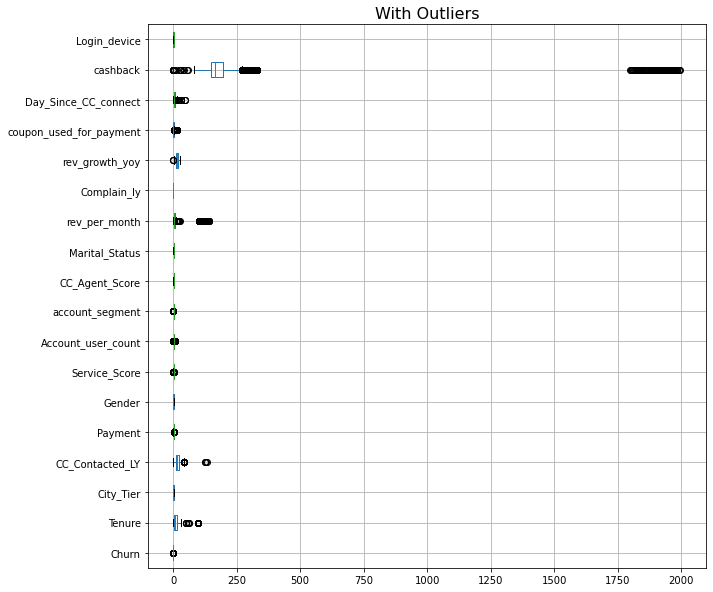

In [102]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index 
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16) 
plt.show()

In [130]:
#Outliner removal
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range    
lrincome,urincome=remove_outlier(df['cashback'])


In [132]:
lrcashback,urcashback=remove_outlier(df['cashback'])
df['cashback']=np.where(df['cashback']>urcashback,urcashback,df['cashback'])
df['cashback']=np.where(df['cashback']<lrcashback,lrcashback,df['cashback'])



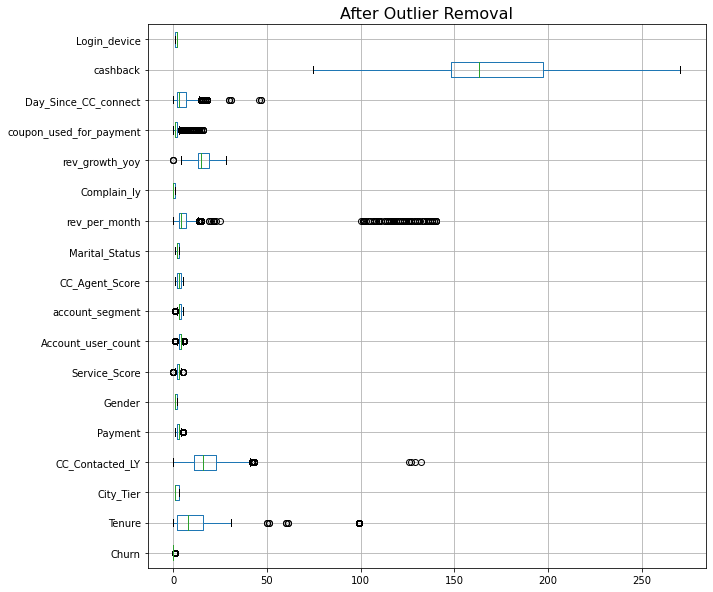

In [133]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()


In [134]:
df.Churn.value_counts(normalize=True)
#SMOTE

0    0.831616
1    0.168384
Name: Churn, dtype: float64

In [135]:
X = df.drop("Churn", axis=1)
Y = df.pop("Churn")

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

In [137]:
#VIF Dataframe
vif_df = pd.DataFrame()
vif_df["feature"] = X_train.columns

In [138]:
# Calculate VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(X_train.values,i)
for i in range(len(X_train.columns))]
print(vif_df)

                    feature        VIF
0                    Tenure   1.924659
1                 City_Tier   4.551492
2           CC_Contacted_LY   4.876609
3                   Payment   8.597093
4                    Gender   8.717642
5             Service_Score  19.178469
6        Account_user_count  16.126309
7           account_segment   8.391817
8            CC_Agent_Score   5.697253
9            Marital_Status  10.568118
10            rev_per_month   1.273261
11              Complain_ly   1.378729
12           rev_growth_yoy  17.167476
13  coupon_used_for_payment   2.208494
14     Day_Since_CC_connect   3.200264
15                 cashback  20.574401
16             Login_device  14.221067


In [139]:
X_train = X_train.drop(["Login_device","Service_Score","Account_user_count","cashback","rev_growth_yoy"], axis=1)
X_test = X_test.drop(["Login_device","Service_Score","Account_user_count","cashback","rev_growth_yoy"], axis=1)

In [140]:
#VIF Dataframe
vif_df = pd.DataFrame()
vif_df["feature"] = X_train.columns
#
# Calculate VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(X_train.values,i)
                        for i in range(len(X_train.columns))]
print(vif_df)

                    feature       VIF
0                    Tenure  1.749735
1                 City_Tier  4.459016
2           CC_Contacted_LY  4.561752
3                   Payment  7.915305
4                    Gender  7.929075
5           account_segment  7.807819
6            CC_Agent_Score  5.297435
7            Marital_Status  8.887355
8             rev_per_month  1.264278
9               Complain_ly  1.368628
10  coupon_used_for_payment  2.080374
11     Day_Since_CC_connect  2.950217


In [141]:
X_test = X_test.apply(zscore)
display(X_test.head())


,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,coupon_used_for_payment,Day_Since_CC_connect
2191,-0.221400,-0.726851,-1.080512,0.224236,-0.809365,-1.943027,0.675249,-0.243002,-0.252781,-0.634225,0.097394,-0.151542
820,0.905617,-0.726851,1.783332,0.224236,1.235537,1.637251,1.408923,-1.749165,-0.088807,1.576727,-0.904119,-0.688418
4224,-0.071131,-0.726851,-0.309477,-1.766486,1.235537,-1.943027,-0.058425,-0.243002,-0.252781,-0.634225,3.101932,1.190645
6703,-0.371669,1.445983,0.792002,0.224236,1.235537,0.742182,-1.525772,-0.243002,-0.170794,1.576727,-0.904119,-0.688418
4318,0.229407,1.445983,-0.750068,1.219597,-0.809365,-1.943027,-1.525772,-0.243002,0.239141,-0.634225,0.097394,1.995958


In [142]:
X_train = X_train.apply(zscore)
display(X_train.head())


,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,coupon_used_for_payment,Day_Since_CC_connect
1813,1.127174,-0.701872,-0.634010,-1.741091,-0.807505,0.743526,1.409301,-0.252688,-0.162731,1.636991,0.110574,1.219843
1586,-0.455240,1.497792,1.606113,1.232104,-0.807505,0.743526,-1.496299,-0.252688,-0.427504,-0.610877,0.110574,-0.715560
840,-0.850843,-0.701872,0.822070,-0.750026,-0.807505,-0.149975,-0.769899,-1.776547,-0.162731,-0.610877,-0.400295,-0.715560
8939,-0.296999,1.497792,-0.409998,-0.750026,-0.807505,0.743526,1.409301,-0.252688,0.102042,-0.610877,-0.400295,1.219843
6207,-0.613481,1.497792,0.262039,2.223169,-0.807505,-1.936977,-0.043499,-0.252688,0.278557,-0.610877,1.132311,0.666871


In [143]:

param_grid = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 10)

In [144]:
param_grid_dt = {
    'criterion': ['gini'],
    'max_depth': [10],
    'min_samples_leaf': [10], 
    'min_samples_split': [50],
}
gs_dtcl = GridSearchCV(dtcl, param_grid_dt, cv = 5, n_jobs = -1, verbose = 1)
gs_dtcl.fit(X_train, Y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [10],
                         'min_samples_leaf': [10], 'min_samples_split': [50]},
             verbose=1)

In [145]:
gs_dtcl.fit(X_train, Y_train)
print(gs_dtcl.best_params_)
best_grid = gs_dtcl.best_estimator_
best_grid

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 50}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=50,
                       random_state=1)

In [146]:

ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [147]:

ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,1.0000,0.0000
1,1.0000,0.0000
2,1.0000,0.0000
3,1.0000,0.0000
4,0.8125,0.1875


In [148]:
cart_train_acc=best_grid.score(X_train,Y_train) 
cart_train_acc

0.9217203755392033

In [149]:
cart_test_acc=best_grid.score(X_test,Y_test)
cart_test_acc

0.8972764949674363

AUC: 0.958


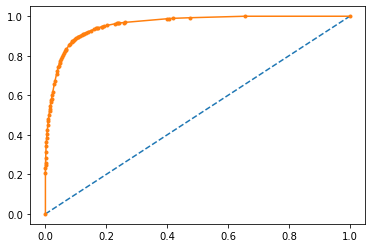

In [150]:
# AUC and ROC for the training data

# predict probabilities
probs = gs_dtcl.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
cart_train_auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % cart_train_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr, marker='.')

# show the plot
plt.show()

AUC: 0.935


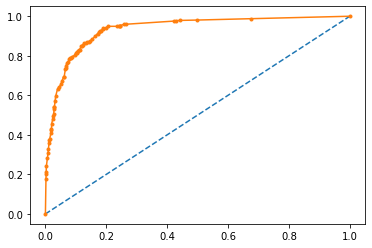

In [151]:
# AUC and ROC for the test data

# predict probabilities
probs = gs_dtcl.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
cart_test_auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % cart_test_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
cart_test_fpr, cart_test_tpr, cart_test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr, marker='.')

# show the plot
plt.show()

In [158]:
##MLP Classifier (Artificial Neural Network)

In [159]:
param_grid = {
    'hidden_layer_sizes': [(100,100,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1,0.01],
    'max_iter' : [10000]
}

mlp = MLPClassifier()

grid_search = GridSearchCV(estimator = mlp, param_grid = param_grid, cv = 3)

In [160]:
#ytrain_predict = mlp.predict(X_train)
#ytest_predict = mlp.predict(X_test)

grid_search.fit(X_train, Y_train)
grid_search.best_params_

{'activation': 'relu',
 'hidden_layer_sizes': (100, 100, 100),
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.01}

In [161]:
best_grid = grid_search.best_estimator_
ann_train_predict_prob=best_grid.predict_proba(X_train)
pd.DataFrame(ann_train_predict_prob).head()

,0,1
0,0.999858,1.417947e-04
1,1.000000,1.258111e-08
2,0.870962,1.290382e-01
3,0.981843,1.815743e-02
4,0.999995,4.979731e-06


In [162]:
ann_test_predict_prob=best_grid.predict_proba(X_test)
pd.DataFrame(ann_test_predict_prob).head()

,0,1
0,0.999968,3.185965e-05
1,0.999919,8.130299e-05
2,0.979435,2.056477e-02
3,0.999999,5.531176e-07
4,0.999938,6.235104e-05


In [164]:

ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [165]:
ann_train_acc = best_grid.score(X_train,Y_train)
ann_train_acc


0.9868053793453438

In [166]:
ann_test_acc = best_grid.score(X_test,Y_test)
ann_test_acc

0.9538188277087034

AUC: 0.998


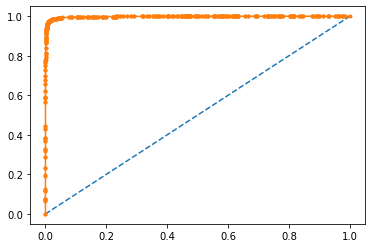

In [167]:
# AUC and ROC for the training data

# predict probabilities
probs =best_grid.predict_proba(X_train)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
ann_train_auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % ann_train_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
ann_train_fpr, ann_train_tpr, ann_train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(ann_train_fpr, ann_train_tpr, marker='.')

# show the plot
plt.show()

AUC: 0.975


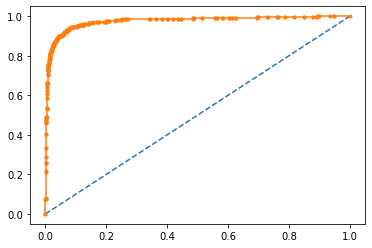

In [168]:
# AUC and ROC for the testing data

# predict probabilities
probs =best_grid.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
from sklearn.metrics import roc_auc_score
ann_test_auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % ann_test_auc)

# calculate roc curve
from sklearn.metrics import roc_curve
ann_test_fpr, ann_test_tpr, ann_test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(ann_test_fpr, ann_test_tpr, marker='.')

# show the plot
plt.show()